## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [242]:
import numpy as np
import pandas as pd
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [244]:
stud_data = pd.read_csv("students-data.csv", delimiter = ';')

In [245]:
stud_data.shape

(395, 33)

In [246]:
stud_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [248]:
stud_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [249]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [26]:
# non_number = []
# for col in stud_data:
#     if stud_data[col].dtypes != "int":
#         non_number.append(col)
# print(non_number)

In [250]:
stud_data.select_dtypes(include = "object").columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [251]:
# stud_data.var(axis = 0)
threshold = 1
stud_data.var()[stud_data.var(axis=0) < threshold]

traveltime    0.486513
studytime     0.704324
failures      0.553017
famrel        0.803997
freetime      0.997725
Dalc          0.793420
dtype: float64

In [252]:
stud_data.drop(columns= ["traveltime","studytime","failures",'famrel',"freetime","Dalc"],inplace = True)
stud_data.shape

(395, 27)

In [253]:
stud_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [254]:
stud_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [255]:
# Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = {}
for i in range(0,stud_data.shape[1]):
    if stud_data.dtypes[i]=='object':
        le[i] = LabelEncoder()
        stud_data[stud_data.columns[i]] = le[i].fit_transform(stud_data[stud_data.columns[i]])

In [256]:
stud_data.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
goout         int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [257]:
stud_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [258]:
stud_data["G1"] = np.where(stud_data["G1"] >= 10 , 1, 0)
stud_data["G2"] = np.where(stud_data["G2"] >= 10 , 1, 0)
stud_data["G3"] = np.where(stud_data["G3"] >= 10 , 1, 0)
stud_data[["G1","G2","G3"]].head()

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [259]:
# (Target-set)
y = stud_data['G3']
# (Feature-set)
X = stud_data.drop('G3' , axis = 1)

In [260]:
X.shape

(395, 26)

In [261]:
y.shape

(395,)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

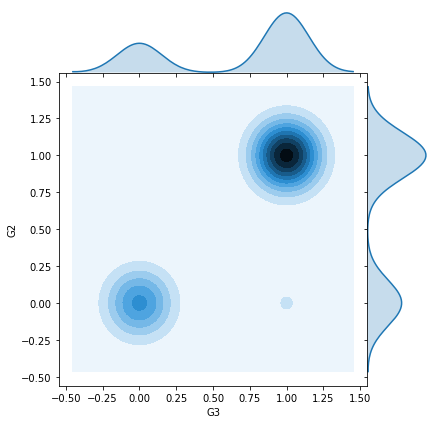

In [262]:
g = sns.jointplot(x="G3", y="G2", data=stud_data , kind = "kde" , space=0)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Text(0.5, 1.0, 'Count of  students in different schools')

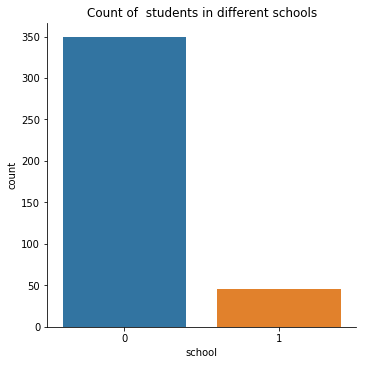

In [263]:
sns.catplot(x="school", kind="count", data=stud_data)
plt.title("Count of  students in different schools")

Text(0.5, 1.0, 'Count of  students with different ages')

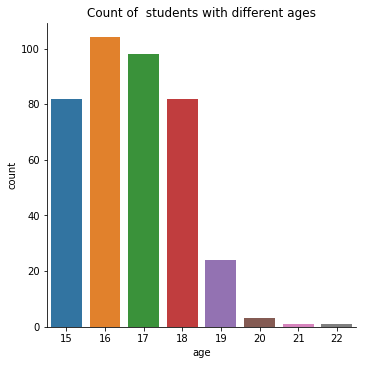

In [264]:
sns.catplot(x="age", kind="count", data=stud_data)
plt.title("Count of  students with different ages")

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [265]:
stud_data.shape

(395, 27)

In [266]:
test_size = 0.24 # taking 75:25 training and test set
seed = 11 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [267]:
X_train.shape

(300, 26)

In [268]:
X_test.shape

(95, 26)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [269]:
# Fit the model 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Model score on train data

In [270]:
y_pred = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_pred))

0.9166666666666666
[[ 91   9]
 [ 16 184]]


In [271]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

0.9363867684478372

### Model score on test data

In [272]:
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9157894736842105
[[27  3]
 [ 5 60]]


In [133]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_predict))

In [273]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9375

# Naive bayes with Iris data

### Import Iris.csv

In [274]:
Iris_data = pd.read_csv("Iris.csv")

In [195]:
Iris_data.shape

(152, 6)

In [275]:
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [276]:
Iris_data.drop(columns= ["Id"],inplace = True)
Iris_data.shape

(152, 5)

In [277]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [278]:
Iris_data.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [279]:
Iris_data.mean()

SepalLengthCm    5.843709
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.202649
dtype: float64

In [280]:
Iris_data.fillna(Iris_data.mean(), inplace=True)
Iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [281]:
#Spliting the dataset in independent and dependent variables
# (Target-set)
y = Iris_data['Species']
# (Feature-set)
X = Iris_data.drop('Species' , axis = 1)

In [282]:
X.shape

(152, 4)

In [283]:
y.shape

(152,)

### Find the distribution of target variable (Class)

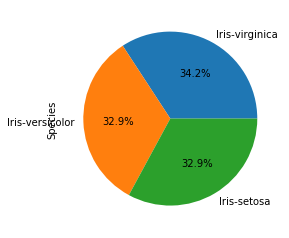

In [284]:
Iris_data.Species.value_counts().plot(kind='pie', autopct='%1.1f%%')

### Plot the distribution of target variable using histogram

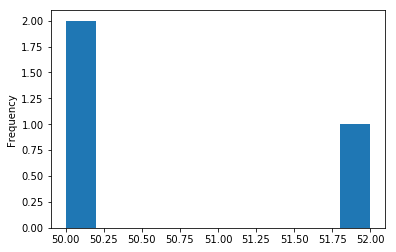

In [285]:
Iris_data.Species.value_counts().plot(kind='hist')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

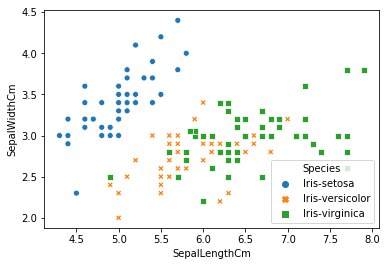

In [300]:
sns.scatterplot(x=Iris_data.SepalLengthCm, y=Iris_data.SepalWidthCm,
                   hue=Iris_data.Species, style=Iris_data.Species)

### Summary Statistics and explain insights for at least 2 variables

In [287]:
Iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.822577,0.430713,1.752697,0.759657
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### PetalLengthCm has Max std dev 1.752697 among all attributes
#### SepalWidthCm has Min std dev 0.430713 among all attributes

### Correlation among all variables and give your insights

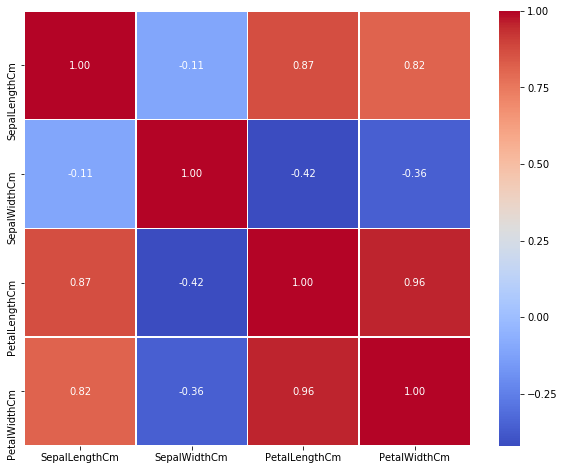

In [288]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data=Iris_data.corr(), cmap='coolwarm', annot=True, fmt = ".2f", linewidths=.5, ax=axes) 
plt.show()

#### Correlation is a number that indicates how the two attributes are related to each other. As this number approaches 1.0, the relationship is strengthened in the right direction. As it approaches -1.0, it is strengthened in the opposite direction. If this value is close to zero, the bond between the two data is weak. For example in the above heatmap, we see some correlation with
a) Petalwidth and PetalLength b)SepalLength and PetalLength

### Split data in Training and Validation in 80:20

In [290]:
test_size = 0.20 # taking 80:20 training and test set
seed = 51 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [291]:
X_train.shape

(121, 4)

In [292]:
X_test.shape

(31, 4)

### Do Feature Scaling

In [293]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [294]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(scaledX_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [295]:
# Predicting the Test set results
y_pred = nvclassifier.predict(scaledX_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


### Print Accuracy and Confusion Matrix and Conclude your findings

In [296]:
# print("Training Accuracy")
# print(nb.score(scaledX_train,y_train))
print("Testing Accuracy")
print(nvclassifier.score(scaledX_test,y_test))

Testing Accuracy
0.9354838709677419


In [302]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9  0  0]
 [ 0  6  1]
 [ 0  1 14]]


In [298]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  29
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9354838709677419


In [301]:
pwd

'D:\\testlab'